# Bankruptcy Prevention

## Business Objective:
##### This is a classification project, since the variable to predict is binary (bankruptcy or non-bankruptcy).

###### The goal here is to model the probability that a business goes bankrupt from different features.

## 1. Import necessary libraries

In [1]:
#Importing nessesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

from pickle import dump
from pickle import load

import warnings
warnings.filterwarnings('ignore')

## 2.Import Data

In [2]:
#Importing our dataset
data=pd.read_csv('bankruptcy-prevention.csv')
data.head(10)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
5,1.0,1.0,0.0,0.5,0.0,0.5,bankruptcy
6,1.0,1.0,0.0,0.0,0.0,0.0,bankruptcy
7,1.0,1.0,0.0,0.0,0.0,0.5,bankruptcy
8,1.0,1.0,0.0,0.5,0.0,0.0,bankruptcy
9,1.0,1.0,0.0,0.5,0.0,1.0,bankruptcy


## 3. Data Understanding

In [3]:
#Counts of target value bankruptcy and non-bankruptcy
print(data[' class'].value_counts())

non-bankruptcy    143
bankruptcy        107
Name:  class, dtype: int64


In [4]:
# Number of rows and columns
data.shape

(250, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [6]:
#For checking null values
data.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

###### There is no null values in our given dataset

In [7]:
#All statastical measures
data.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Inference:
*Average of credibility and competitiveness is almost same here.

## 4. Data Preparation

In [8]:
#Checking data typees
data.dtypes

industrial_risk           float64
 management_risk          float64
 financial_flexibility    float64
 credibility              float64
 competitiveness          float64
 operating_risk           float64
 class                     object
dtype: object

#### *Here we found our target value as a object so we need to convert integer because in machine learning prediction, machine will never understand our english word.

#### DATA TRANSFORMATION
* If data is CONTINUOUS = Standard Scaler, MinMaxScaler, Robust Scaler
* If data is DISCRETE = Label Encoder, One hot Encoder

In [9]:
bankruptcy_data=data.copy()
bankruptcy_data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [10]:
#Transforming our target value
le=LabelEncoder()
bankruptcy_data[' class']=le.fit_transform(bankruptcy_data[' class'])
bankruptcy_data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


In [11]:
#Again checking datatypes,Now we can see all our inputs are in numbers
bankruptcy_data.dtypes

industrial_risk           float64
 management_risk          float64
 financial_flexibility    float64
 credibility              float64
 competitiveness          float64
 operating_risk           float64
 class                      int32
dtype: object

In [12]:
#Finding the correlation between inputs.
bankruptcy_data.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,-0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,-0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,-0.279786
class,-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786,1.000000


<AxesSubplot:>

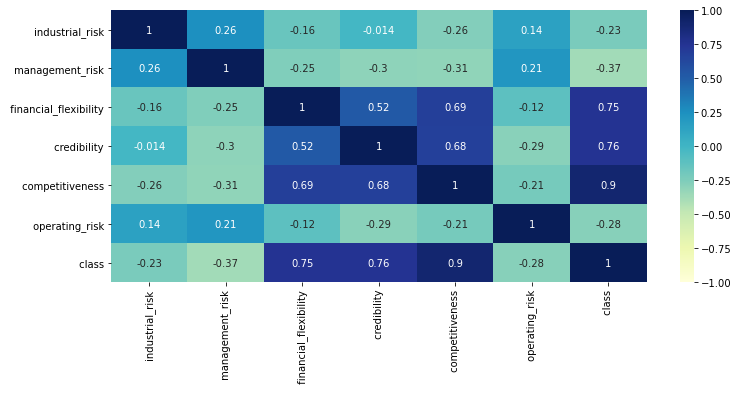

In [13]:
#Lets understand our correlation using heatmap
plt.figure(figsize=(12,5))
sns.heatmap(data=bankruptcy_data.corr(),cmap="YlGnBu",vmin = -1, vmax = 1,annot=True)

1    143
0    107
Name:  class, dtype: int64


Text(0.5, 1.0, 'Countplot')

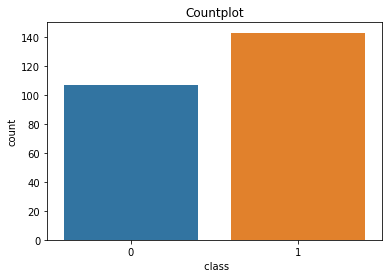

In [14]:
#visulaizing the our target variable using countplot
print(bankruptcy_data[' class'].value_counts())
sns.countplot(bankruptcy_data[' class'])
plt.title('Countplot')

##### 1. non-bankruptcy majority class(1) : 143
##### 2. bankruptcy  minority class  (0)    : 107

## 5.Model Building, Testing and Evaluation without scaling

In [15]:
#Model building
x=bankruptcy_data.drop(labels=' class',axis=1)
y=bankruptcy_data[[' class']]

In [16]:
# Train Test splitting
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= 0.20,random_state=12,shuffle=True)

In [17]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((200, 6), (200, 1), (50, 6), (50, 1))

In [18]:
x_train

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
220,0.5,0.5,1.0,1.0,1.0,0.5
213,0.5,0.0,0.0,1.0,0.5,0.0
144,0.5,1.0,0.5,1.0,1.0,0.5
29,0.0,0.5,0.0,0.0,0.0,1.0
142,0.0,1.0,1.0,1.0,0.5,1.0
...,...,...,...,...,...,...
130,0.5,0.5,1.0,1.0,0.5,0.5
241,1.0,0.0,0.5,0.5,0.5,1.0
134,0.0,1.0,0.5,0.5,0.5,1.0
155,0.5,1.0,0.0,0.5,1.0,0.0


In [19]:
y_train

,class
220,1
213,1
144,1
29,0
142,1
...,...
130,1
241,1
134,1
155,1


In [20]:
x_test.head(10)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
207,0.0,0.0,0.5,0.5,1.0,1.0
31,1.0,1.0,0.0,0.0,0.0,1.0
48,0.0,1.0,0.0,0.0,0.5,0.5
52,1.0,0.0,0.0,0.0,0.0,1.0
244,1.0,0.0,1.0,1.0,1.0,1.0
171,0.0,1.0,0.0,1.0,1.0,0.5
228,1.0,1.0,1.0,0.5,0.5,1.0
149,0.5,1.0,1.0,0.5,1.0,1.0
199,0.5,1.0,0.0,1.0,1.0,0.5
183,0.5,0.0,0.0,1.0,0.5,0.0


In [21]:
y_test.head(10)

,class
207,1
31,0
48,0
52,0
244,1
171,1
228,1
149,1
199,1
183,1


### 1.Logistic Regression

In [22]:
# logistic Regression
print('Logistic Regression')
log_model = LogisticRegression()
log_model.fit(x_train,y_train)
y_pred_train_log = log_model.predict(x_train)
y_pred_test_log = log_model.predict(x_test)

print("Training Accuracy = ",np.round(accuracy_score(y_train, y_pred_train_log),2))
print("Testing Accuracy = ",np.round(accuracy_score(y_test,y_pred_test_log),2))
print(np.round(confusion_matrix(y_test,y_pred_test_log),2))
print(classification_report(y_test,y_pred_test_log))
print("Training ROC AUC score= ",np.round(roc_auc_score(y_train, y_pred_train_log),2))
print("Testing ROC AUC score= ",np.round(roc_auc_score(y_test,y_pred_test_log),2))

Logistic Regression
Training Accuracy =  1.0
Testing Accuracy =  1.0
[[19  0]
 [ 0 31]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        31

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Training ROC AUC score=  0.99
Testing ROC AUC score=  1.0


## 2. Decision tree classifier

In [23]:
print('\n\nDecision Tree')
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred_train_dt = dt_model.predict(x_train)
y_pred_test_dt  = dt_model.predict(x_test)
print("Training Accuracy = ",np.round(accuracy_score(y_train, y_pred_train_dt),2))
print("Testing Accuracy = ",np.round(accuracy_score(y_test,y_pred_test_dt),2))
print(np.round(confusion_matrix(y_test,y_pred_test_dt),2))
print(classification_report(y_test,y_pred_test_dt))
print("Training ROC AUC score= ",np.round(roc_auc_score(y_train, y_pred_train_dt),2))
print("Testing ROC AUC score= ",np.round(roc_auc_score(y_test,y_pred_test_dt),2))



Decision Tree
Training Accuracy =  1.0
Testing Accuracy =  1.0
[[19  0]
 [ 0 31]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        31

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Training ROC AUC score=  1.0
Testing ROC AUC score=  1.0


## 3. Gaussian Naive bayes

In [24]:
print('\n\nGaussian NB')
gnb_model = GaussianNB()
gnb_model.fit(x_train, y_train)
y_pred_train_gnb = gnb_model.predict(x_train)
y_pred_test_gnb  = gnb_model.predict(x_test)

print("Training Accuracy = ",np.round(accuracy_score(y_train, y_pred_train_gnb),2))
print("Testing Accuracy = ",np.round(accuracy_score(y_test,y_pred_test_gnb),2))
print(np.round(confusion_matrix(y_test,y_pred_test_gnb),2))
print(classification_report(y_test,y_pred_test_gnb))
print("Training ROC AUC score= ",np.round(roc_auc_score(y_train, y_pred_train_gnb),2))
print("Testing ROC AUC score= ",np.round(roc_auc_score(y_test, y_pred_test_gnb),2))



Gaussian NB
Training Accuracy =  0.98
Testing Accuracy =  0.98
[[18  1]
 [ 0 31]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.97      1.00      0.98        31

    accuracy                           0.98        50
   macro avg       0.98      0.97      0.98        50
weighted avg       0.98      0.98      0.98        50

Training ROC AUC score=  0.98
Testing ROC AUC score=  0.97


## 4. Random Forest

In [25]:
print('\n\nRandom Forest')
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)
y_pred_train_rf = rf_model.predict(x_train)
y_pred_test_rf  = rf_model.predict(x_test)

print("Training Accuracy = ",np.round(accuracy_score(y_train, y_pred_train_rf),2))
print("Testing Accuracy = ",np.round(accuracy_score(y_test,y_pred_test_rf),2))
print(np.round(confusion_matrix(y_test,y_pred_test_rf),2))
print(classification_report(y_test,y_pred_test_rf))
print("Training ROC AUC score= ",np.round(roc_auc_score(y_train, y_pred_train_rf),2))
print("Testing ROC AUC score= ",np.round(roc_auc_score(y_test,y_pred_test_rf),2))



Random Forest
Training Accuracy =  1.0
Testing Accuracy =  1.0
[[19  0]
 [ 0 31]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        31

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Training ROC AUC score=  1.0
Testing ROC AUC score=  1.0


## 5. Gradiant Boosting 

In [26]:
print('\n\n GB boost')
gb_model = GradientBoostingClassifier()
gb_model.fit(x_train,y_train)
y_pred_train_gb  = gb_model.predict(x_train)
y_pred_test_gb   = gb_model.predict(x_test)

print("Training Accuracy = ",np.round(accuracy_score(y_train, y_pred_train_gb),2))
print("Testing Accuracy = ",np.round(accuracy_score(y_test,y_pred_test_gb),2))
print(np.round(confusion_matrix(y_test,y_pred_test_gb),2))
print(classification_report(y_test,y_pred_test_gb))
print("Training ROC AUC score= ",np.round(roc_auc_score(y_train, y_pred_train_gb),2))
print("Testing ROC AUC score= ",np.round(roc_auc_score(y_test,y_pred_test_gb),2))



 GB boost
Training Accuracy =  1.0
Testing Accuracy =  1.0
[[19  0]
 [ 0 31]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        31

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Training ROC AUC score=  1.0
Testing ROC AUC score=  1.0


## Model Deployement

In [144]:
import pickle

In [146]:
filename = 'bankruptcy_prevention.sav'
pickle.dump(gb_model,open(filename, 'wb'))

In [148]:
loaded_logistic_model=load(open('bankruptcy_prevention.sav','rb'))

## The End....!!